# Introduction to Imaginery Number and Hermitian
by Kreecha Puphaiboon
20/9/2021

Hi my name is Kreecha Puphaiboon I work for Krungsri Bank in Thailand (https://www.krungsri.com). I am writing this with main objectives:
 - To introduce: 1) Complex, 2) Hermitian, and 3) Unitary Matrices
 - To explain how they are used in optimization based on Hermitian matrices which have real eigenvalues whose eigenvectors form a unitary basis use in Clustering of 3 Dimensional Space and Digital Signal processing.
 
At work, I am working on two projects: 1) clustering for marketing campaings whih require optimization for advertising based on time, click through rate and investment cost and 2) voice authentication. For some bizarre resaon i have the opportunity to use complex and hermitian matrices at the same time, what's a luck. So i started talking to many people but not many undestand, so i though may be i write about it and explain to everyone at once. It is also nicer to share to the public.

Let's get started.

### 1) Complex Matrix

Recall that first <b>complex numbers</b> $z$ is a number that can be written as
$$
z=a+i b
$$
where $a$ and $b$ are real numbers, called the real and <b>imaginary part of the complex number</b>, and
$$
i=\sqrt{-1}
$$
is called imaginary unit. Imaginary unit is not knowing can be either positive or negative caused by shifting or translate when you dont know the state. For example, when you are in the total darkness or in space you dont know you will be moving to left or right. If we base where you stand on a line number as a starting point the middle based at 0 to the right it is positive and to the left is negative. But when you are in the total darkness you don't know the direction.

When we manipulate complex numbers, we often see
$$
i^{2}=-1
$$

People may wonder why we have to deal with -1, let me give you an example. My project dealing with voice, we have to deal with signal which comes in as a sine wave (see below Figure). Let's say we want to capture the wave a at every 38 tick (we dont want to process so we can compute faster), then i randomly pick up a number (x=38) then you can see i pick up -1. This is an example when we are some time don't know what we are going to get. In this signaling problem, we have to deal with both positive and negative numbers

<IPython.core.display.Javascript object>


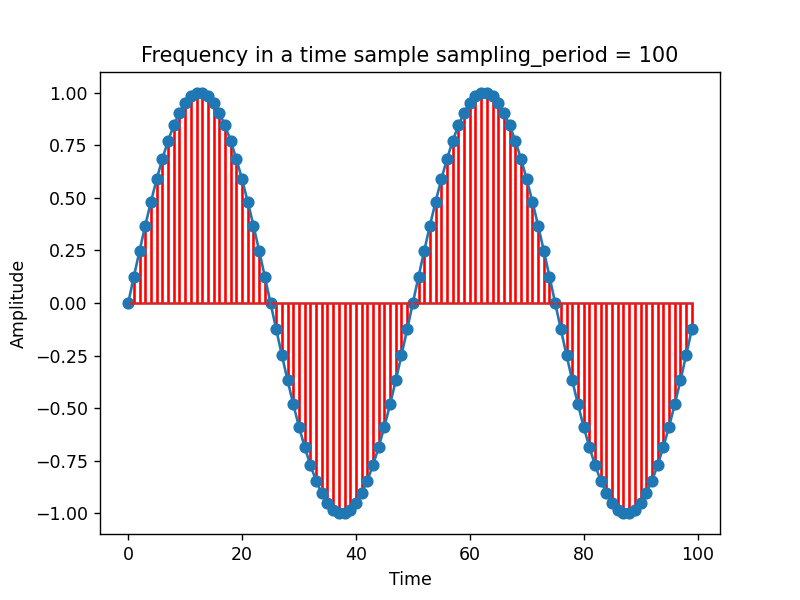

In [51]:
import matplotlib.pyplot as plt
import numpy as np 

sr = 100          # sample rate 
f = 2             # the frequency of the signal such as 2 seconds

time = np.arange(sr) # the points on the x axis the sampling time interval

# fake the value (amplitude) of the sin wave 
y = np.sin(2 * np.pi * f * (time/sr)) 

plt.title('Frequency in a time sample sampling_period = 100')
plt.stem(time, y, 'r', )
plt.xlabel('Time'), plt.ylabel('Amplitude')
plt.plot(time,y)


Back to Imaginary numbers, they allow us to find solutions to equations that have no real solutions. For example, the equation
$$
z^{2}=-1
$$
has no real solution, but it has two imaginary solutions
$$
z=\pm i
$$
To think simply of the fact, a real number can be seen as a complex number with zero imaginary part.

Complex numbers can also be represented in polar form, which has a magnitude term and an angular term.
The magnitude of a complex number $z=x+i y$ is given as $|z|=\sqrt{x^{2}+y^{2}}$, and its angular term is calculated as $\theta=\tan ^{-1}\left(\frac{y}{x}\right)$.

<b>Complex conjugate</b>
An important concept is that of complex conjugate. Given a complex number
$$
z=a+i b
$$
its conjugate, denoted by $\bar{z}$, is
$$
\bar{z}=a-i b
$$
As a consequence, double conjugation leaves numbers unchanged:
$$
\overline{\bar{z}}=\overline{\overline{a+i b}}=\overline{a-i b}=a+i b
$$
Note that the complex conjugate simply changing the sign of the imaginary part (the real part does not change)

#### Complex matrices
Complex matrices (and vectors) are matrices whose entries are complex numbers.
Complex conjugation of matrices
Given a $K \times L$ matrix $A$, its complex conjugate $\bar{A}$ is the matrix such that
$$
\bar{A}_{k l}=\overline{A_{k 1}}
$$
that is, the $(k, l)$-th entry of $\bar{A}$ is equal to the complex conjugate of the $(k, l)$-th entry of $A$, for any $k \leq K$ and $l \leq L$.
Example Define the matrix
$$
A=\left[\begin{array}{cc}
1+2 i & 0 \\
3 & -i
\end{array}\right]
$$
Then its complex conjugate is
$$
\bar{A}=\left[\begin{array}{cc}
1-2 i & 0 \\
3 & i
\end{array}\right]
$$

Allow me to repeat if <b>original matrix</b> is $\left[\begin{array}{ccc}2+3 i & i & 6-4 i \\ 7 & 2-3 i & -i\end{array}\right]$


<b>Complex conjugate</b> = $\left[\begin{array}{ccc}
2-3 i & -i & 6+4 i \\
7 & 2+3 i & i
\end{array}\right]$

<b>Conjugate transpose</b> or known as Hermitian Transpose $\left[\begin{array}{cc}2-3 i & 7 \\ -i & 2+3 i \\ 6+4 i & i\end{array}\right]$

### 2) Hermitian Matrix

A square matrix is called Hermitian if it is self-adjoint. Hermitian matrices have real eigenvalues whose eigenvectors form a unitary basis. For real matrices, Hermitian is the same as symmetric. $$M^{H}=M$$

In [52]:
import numpy as np

# Make a random hermitian matrix, H
R= np.random.rand(6, 6) + 1.j * np.random.rand(6, 6)
H = R + R.T.conj()
print(H)

[[1.597+0.j    1.637-0.607j 1.298+0.167j 1.17 +0.007j 1.241+0.058j
  0.779+0.056j]
 [1.637+0.607j 0.93 +0.j    1.712-0.42j  1.683+0.256j 1.155-0.896j
  1.143+0.407j]
 [1.298-0.167j 1.712+0.42j  1.143+0.j    0.861+0.231j 0.449-0.241j
  1.26 -0.169j]
 [1.17 -0.007j 1.683-0.256j 0.861-0.231j 1.41 +0.j    1.056+0.427j
  1.492+0.351j]
 [1.241-0.058j 1.155+0.896j 0.449+0.241j 1.056-0.427j 0.348+0.j
  0.892+0.359j]
 [0.779-0.056j 1.143-0.407j 1.26 +0.169j 1.492-0.351j 0.892-0.359j
  1.955+0.j   ]]


In [53]:
# Determine eigenvalues and rotation matrix
ev_eps, U = np.linalg.eigh(H)

# Sort eigenvalues
sorted_indices = ev_eps.real.argsort()
ev_eps = ev_eps[sorted_indices]
U = U[:, sorted_indices]
print(U)


[[-0.338+0.j     0.186+0.j     0.532+0.j     0.472+0.j    -0.402+0.j
  -0.427-0.j   ]
 [ 0.216+0.616j  0.004-0.074j -0.339+0.385j -0.109-0.059j -0.264-0.073j
  -0.463-0.036j]
 [ 0.137-0.283j -0.394+0.386j  0.051-0.292j -0.305-0.341j -0.183-0.347j
  -0.381-0.023j]
 [-0.17 -0.192j -0.452-0.401j -0.151-0.161j -0.094+0.461j  0.078+0.33j
  -0.428-0.026j]
 [ 0.418-0.32j   0.38 +0.039j -0.432-0.234j  0.478-0.018j  0.125+0.031j
  -0.293-0.07j ]
 [-0.1  +0.092j  0.37 +0.089j  0.273+0.032j -0.321-0.001j  0.69 -0.04j
  -0.423+0.043j]]


In [54]:
# Make print of numpy arrays less messy:
np.set_printoptions(precision=3, suppress=True)

dot = np.dot(np.dot(U.T.conj(), H), U)
print('Dot = ', dot)
dia = np.diag(ev_eps)
print('Dia = ', dia)

Dot =  [[-1.982+0.j -0.   -0.j  0.   +0.j  0.   +0.j  0.   +0.j -0.   +0.j]
 [-0.   -0.j -0.491+0.j  0.   -0.j -0.   -0.j  0.   +0.j  0.   -0.j]
 [-0.   -0.j  0.   +0.j  0.296-0.j  0.   +0.j  0.   -0.j  0.   -0.j]
 [-0.   -0.j -0.   +0.j  0.   -0.j  0.914+0.j  0.   +0.j  0.   +0.j]
 [ 0.   -0.j -0.   -0.j  0.   +0.j  0.   -0.j  1.286-0.j -0.   +0.j]
 [-0.   +0.j  0.   +0.j  0.   +0.j  0.   -0.j -0.   -0.j  7.361+0.j]]
Dia =  [[-1.982  0.     0.     0.     0.     0.   ]
 [ 0.    -0.491  0.     0.     0.     0.   ]
 [ 0.     0.     0.296  0.     0.     0.   ]
 [ 0.     0.     0.     0.914  0.     0.   ]
 [ 0.     0.     0.     0.     1.286  0.   ]
 [ 0.     0.     0.     0.     0.     7.361]]


In [55]:
# Check that U diagonalizes H:
print('====== Check that U diagonalizes H: =======')
print(np.dot(np.dot(U.T.conj(), H), U) - np.diag(ev_eps))
print('=============')
print(np.allclose(np.dot(np.dot(U.T.conj(), H), U), np.diag(ev_eps)))
print('=============')

# The eigenvectors of H are the columns of U:
print('====== The eigenvectors of H are the *coloumns* of U =======')
print(np.allclose(np.dot(H, U), ev_eps * U))
print('=============')


====== Check that U diagonalizes H: =======
[[-0.+0.j -0.-0.j  0.+0.j  0.+0.j  0.+0.j -0.+0.j]
 [-0.-0.j -0.+0.j  0.-0.j -0.-0.j  0.+0.j  0.-0.j]
 [-0.-0.j  0.+0.j  0.-0.j  0.+0.j  0.-0.j  0.-0.j]
 [-0.-0.j -0.+0.j  0.-0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.-0.j -0.-0.j  0.+0.j  0.-0.j  0.-0.j -0.+0.j]
 [-0.+0.j  0.+0.j  0.+0.j  0.-0.j -0.-0.j  0.+0.j]]
True
====== The eigenvectors of H are the *coloumns* of U =======
True


In [56]:
C = np.matrix([[1-5j, 2 + 5j, 3-3j], [4 + 6j, 5-8j, 6-2j], [7 + 6j, 8-6j, 9 + 1.j]])
C_dagger = C.getH()
print(C_dagger)

[[1.+5.j 4.-6.j 7.-6.j]
 [2.-5.j 5.+8.j 8.+6.j]
 [3.+3.j 6.+2.j 9.-1.j]]


### 3) Unitary Matrices

Possibly, the real use of a unitary matrix is an orthogonal matrix which have significant importance in many areas, sound engineering, engineering and quantum mechanics because they preserve norms, and thus, probability amplitudes. Remember that for real number Orthogonal (real)
- columns form an
orthonormal basis
$\mathbf{A}^{\top}=\mathbf{A}^{-1}$
(transpose = inverse)

Unitary (complex)
- columns form an
orthonormal vectors
$\mathbf{U}^{\top}=\mathbf{U}^{-1}$
(transpose = inverse)

A real unitary matrix is an orthogonal matrix in fact. What we see if the inverse of a matrix is equal to the identity matrix.

\begin{gathered}
U^{H} U=\left[\begin{array}{cc}
-i / \sqrt{2} & 1 / \sqrt{2} \\
-1 / \sqrt{2} & i / \sqrt{2}
\end{array}\right]\left[\begin{array}{cc}
{[i / \sqrt{2}} & -1 / \sqrt{2} \\
1 / \sqrt{2} & -i / \sqrt{2}
\end{array}\right] \\
U^{H} U=\left[\begin{array}{cc}
-(-1) / 2+1 / 2 & i / 2-i / 2 \\
-i / 2+i / 2 & 1 / 2-(-1) / 2
\end{array}\right]=\left[\begin{array}{ll}
1 & 0 \\
0 & 1
\end{array}\right]
\end{gathered}

In [57]:
import numpy as np
import scipy.linalg

def diagonalize_unitary_using_two_orthogonals(u):
    """ Decomposes u into L @ np.diag(D) @ R.T where L and R are real orthogonal.
    
        Parameters
    ----------
    u

    Returns
    left, diag, right
    -------
    """
    
    diag_r, diag_i, left, right = scipy.linalg.qz(np.real(u), np.imag(u))
    
    diag = np.diagonal(diag_r) + np.diagonal(diag_i) * 1j
    return left, diag, right



left, diag, right = diagonalize_unitary_using_two_orthogonals(C)
print('C=', C)
print('left=', left)
print('diag=', diag)
print('right=', right)

C= [[1.-5.j 2.+5.j 3.-3.j]
 [4.+6.j 5.-8.j 6.-2.j]
 [7.+6.j 8.-6.j 9.+1.j]]
left= [[ 0.122  0.929  0.35 ]
 [ 0.492 -0.363  0.791]
 [ 0.862  0.075 -0.502]]
diag= [ 8.452+0.769j -0.   +9.64j  -1.436+3.506j]
right= [[ 0.75  -0.661 -0.003]
 [ 0.59   0.671 -0.448]
 [-0.298 -0.335 -0.894]]


Uses of unitary matrices are beyond the scope of the writing but they are used widely in Spectral and Voice analysis. For a unitary matrix: a) all eigenvalues have absolute value 1. b) eigenvectors corresponding to distinct eigenvalues are orthogonal, c) there is an orthogonal basis of the whole space, consisting of eigenvectors.

I hope the content and code will be helpful to some people. Thank you to xxxx to help me review the content. We work as Krungsri Data Science, Department of Data Intelligence by the way.